In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")
import random
from operator import add

import data_loader as loader
import Ml_functions as ml
from sklearn.ensemble import RandomForestClassifier  # Random forest classifier
from sklearn.tree import DecisionTreeClassifier  # for Decision Tree classifier
from sklearn.svm import SVC  # for SVM classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split  # to split the data
from sklearn.model_selection import KFold  # For cross validation
from sklearn.model_selection import (
    GridSearchCV,
)  # for tunnig hyper parameter it will use all combination of given parameters
from sklearn.model_selection import (
    RandomizedSearchCV,
)  # same for tunning hyper parameter but will use random combinations of parameters

In [2]:
# reading data
data = pd.read_csv("../../../datasets/winequality.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,recommend
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,False
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,False
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,False
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False


In [3]:
data.describe()  # To detect Outliers and missing features

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [4]:
data.shape

(4898, 13)

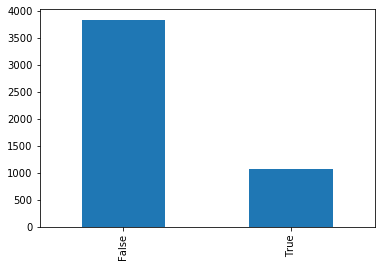

In [5]:
data["recommend"].value_counts().plot(x=data["recommend"], kind="bar")

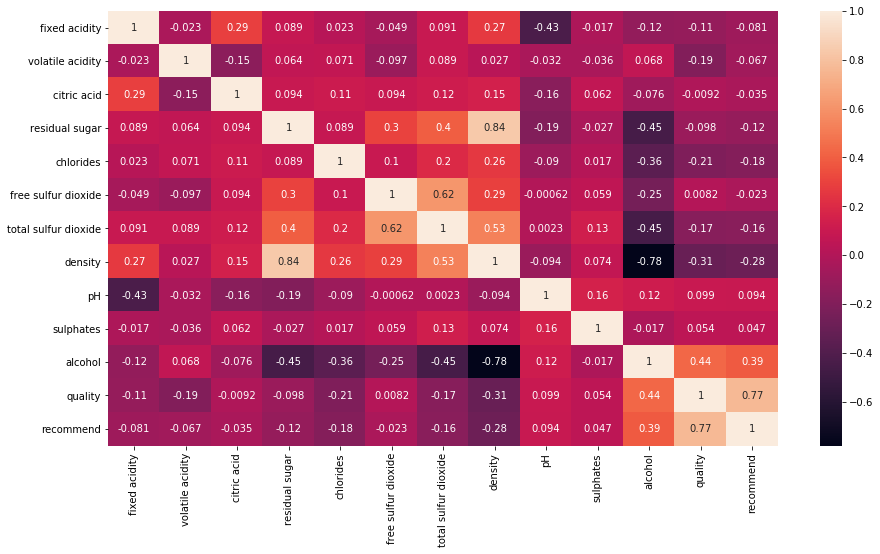

In [6]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
sns.heatmap(data.corr(), annot=True)
plt.show()

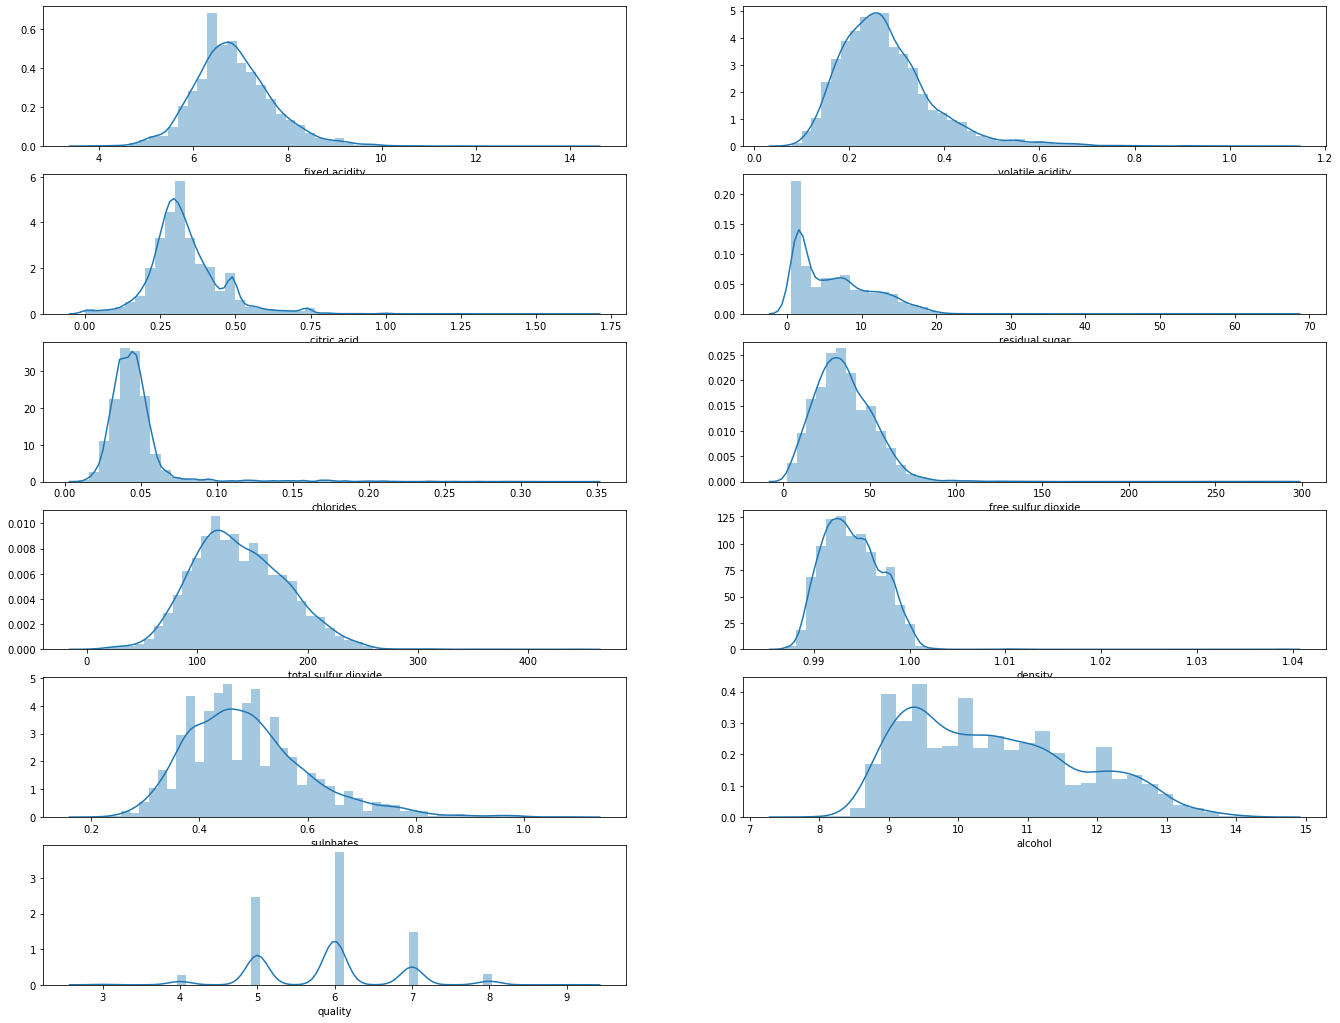

In [7]:
continuous_features = [
    "fixed acidity",
    "volatile acidity",
    "citric acid",
    "residual sugar",
    "chlorides",
    "free sulfur dioxide",
    "total sulfur dioxide",
    "density",
    "sulphates",
    "alcohol",
    "quality",
]
number_of_columns = len(continuous_features) / 5
number_of_rows = 5
plt.figure(figsize=(23, 18))

for i, f in enumerate(continuous_features):
    plt.subplot(number_of_rows + 1, number_of_columns, i + 1)
    sns.distplot(data[f], kde=True)

In [8]:
data.skew()

fixed acidity           0.647751
volatile acidity        1.576980
citric acid             1.281920
residual sugar          1.077094
chlorides               5.023331
free sulfur dioxide     1.406745
total sulfur dioxide    0.390710
density                 0.977773
pH                      0.457783
sulphates               0.977194
alcohol                 0.487342
quality                 0.155796
recommend               1.377716
dtype: float64

In [9]:
# since data is skewed, we add epsilon to data and take its logarithm
data[
    [
        "fixed acidity",
        "volatile acidity",
        "residual sugar",
        "chlorides",
        "free sulfur dioxide",
        "total sulfur dioxide",
        "density",
        "sulphates",
        "alcohol",
        "quality",
    ]
] = np.add(
    data[
        [
            "fixed acidity",
            "volatile acidity",
            "residual sugar",
            "chlorides",
            "free sulfur dioxide",
            "total sulfur dioxide",
            "density",
            "sulphates",
            "alcohol",
            "quality",
        ]
    ],
    0.00000001,
)
data[
    [
        "fixed acidity",
        "volatile acidity",
        "residual sugar",
        "chlorides",
        "free sulfur dioxide",
        "total sulfur dioxide",
        "density",
        "pH",
        "sulphates",
        "alcohol",
        "quality",
    ]
] = np.log(
    data[
        [
            "fixed acidity",
            "volatile acidity",
            "residual sugar",
            "chlorides",
            "free sulfur dioxide",
            "total sulfur dioxide",
            "density",
            "pH",
            "sulphates",
            "alcohol",
            "quality",
        ]
    ]
)

In [10]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,recommend
0,1.945910,-1.309333,0.36,3.030134,-3.101093,3.806662,5.135798,0.001000,1.098612,-0.798508,2.174752,1.791759,False
1,1.840550,-1.203973,0.34,0.470004,-3.015935,2.639057,4.882802,-0.006018,1.193922,-0.713350,2.251292,1.791759,False
2,2.091864,-1.272966,0.40,1.931521,-2.995732,3.401197,4.574711,-0.004912,1.181727,-0.820981,2.312535,1.791759,False
3,1.974081,-1.469676,0.32,2.140066,-2.847312,3.850148,5.225747,-0.004410,1.160021,-0.916291,2.292535,1.791759,False
4,1.974081,-1.469676,0.32,2.140066,-2.847312,3.850148,5.225747,-0.004410,1.160021,-0.916291,2.292535,1.791759,False


In [11]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,1.917529,-1.337575,0.334192,1.480928,-3.149010,3.434852,4.878250,-0.005995,1.158368,-0.739148,2.346046,1.759589
std,0.121554,0.338158,0.121020,0.921745,0.331230,0.547532,0.336117,0.003005,0.046997,0.223792,0.115032,0.153900
min,1.335001,-2.525729,0.000000,-0.510826,-4.710530,0.693147,2.197225,-0.012974,1.000632,-1.514128,2.079442,1.098612
25%,1.840550,-1.560648,0.270000,0.530628,-3.324236,3.135494,4.682131,-0.008312,1.128171,-0.891598,2.251292,1.609438
50%,1.916923,-1.347074,0.320000,1.648659,-3.146555,3.526361,4.897840,-0.006280,1.156881,-0.755023,2.341806,1.791759
75%,1.987874,-1.139434,0.390000,2.292535,-2.995732,3.828641,5.117994,-0.003908,1.187843,-0.597837,2.433613,1.791759
max,2.653242,0.095310,1.660000,4.186620,-1.061316,5.666427,6.086775,0.038239,1.340250,0.076961,2.653242,2.197225


In [12]:
data.skew()

fixed acidity           0.076851
volatile acidity        0.139383
citric acid             1.281920
residual sugar         -0.161157
chlorides               1.134134
free sulfur dioxide    -0.936322
total sulfur dioxide   -0.984216
density                 0.930942
pH                      0.298823
sulphates               0.233757
alcohol                 0.310135
quality                -0.407772
recommend               1.377716
dtype: float64

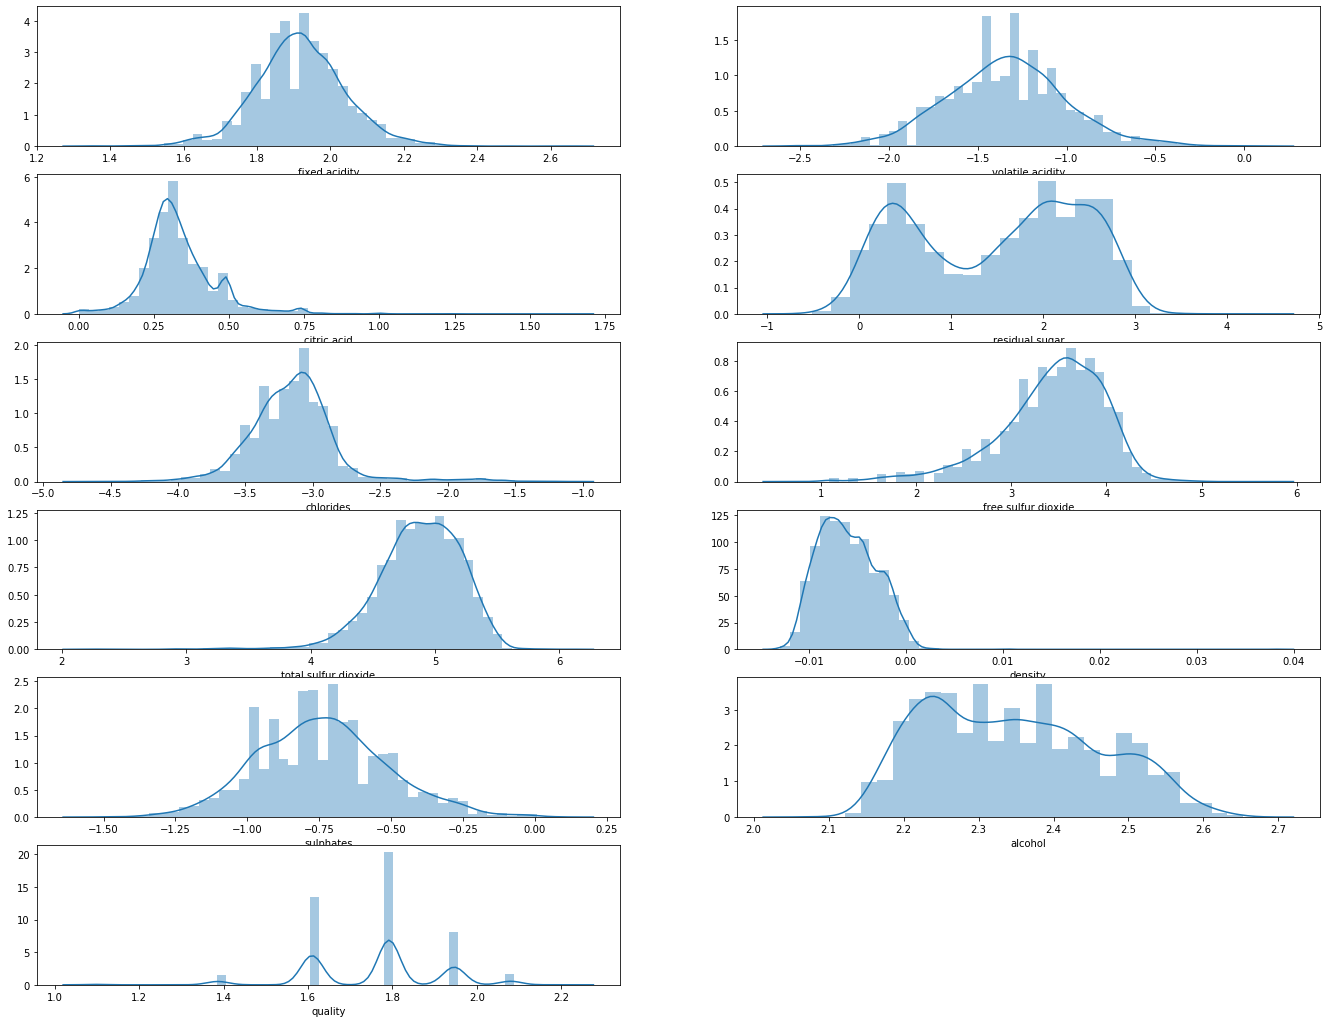

In [13]:
continuous_features = [
    "fixed acidity",
    "volatile acidity",
    "citric acid",
    "residual sugar",
    "chlorides",
    "free sulfur dioxide",
    "total sulfur dioxide",
    "density",
    "sulphates",
    "alcohol",
    "quality",
]
number_of_columns = len(continuous_features) / 5
number_of_rows = 5
plt.figure(figsize=(23, 18))

for i, f in enumerate(continuous_features):
    plt.subplot(number_of_rows + 1, number_of_columns, i + 1)
    sns.distplot(data[f], kde=True)

# Predictions:

## Take true recommendation in  0.5 , 0.33 and 0.25  proportion of total data while undersampling with the help of the loops

the model classification for 0.5 proportion of true (recommended)
the recall for this model is : 0.1473851030110935
TP 93
TN 2250
FP 58
FN 538


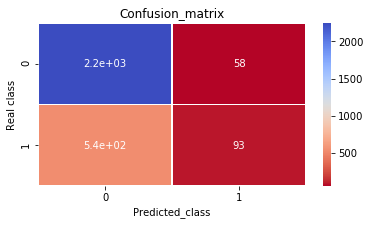


----------Classification Report------------------------------------
              precision    recall  f1-score   support

       False       0.81      0.97      0.88      2308
        True       0.62      0.15      0.24       631

    accuracy                           0.80      2939
   macro avg       0.71      0.56      0.56      2939
weighted avg       0.77      0.80      0.74      2939

________________________________________________________________________________________________________
the model classification for 0.3333333333333333 proportion of true (recommended)
the recall for this model is : 0.18478260869565216
TP 170
TN 3348
FP 141
FN 750


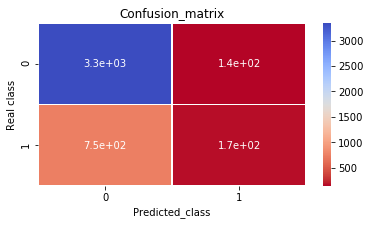


----------Classification Report------------------------------------
              precision    recall  f1-score   support

       False       0.82      0.96      0.88      3489
        True       0.55      0.18      0.28       920

    accuracy                           0.80      4409
   macro avg       0.68      0.57      0.58      4409
weighted avg       0.76      0.80      0.76      4409

________________________________________________________________________________________________________
the model classification for 0.25 proportion of true (recommended)
the recall for this model is : 0.17929482370592648
TP 239
TN 4382
FP 163
FN 1094


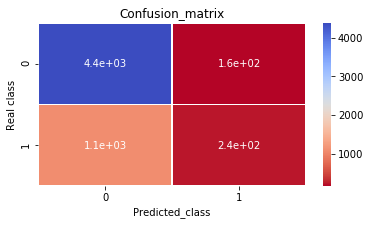


----------Classification Report------------------------------------
              precision    recall  f1-score   support

       False       0.80      0.96      0.87      4545
        True       0.59      0.18      0.28      1333

    accuracy                           0.79      5878
   macro avg       0.70      0.57      0.58      5878
weighted avg       0.75      0.79      0.74      5878

________________________________________________________________________________________________________


In [14]:
# Logistic Regression

for i in range(1, 4):
    print(
        "the model classification for {} proportion of true (recommended)".format(
            1 / (i + 1)
        )
    )
    (
        undersample_features_train,
        undersample_features_test,
        undersample_labels_train,
        undersample_labels_test,
    ) = loader.load_split_preprocessed_data(i)
    clf = LogisticRegression()
    ml.model(
        clf,
        undersample_features_train,
        undersample_features_test,
        undersample_labels_train,
        undersample_labels_test,
    )
    print(
        "________________________________________________________________________________________________________"
    )

the model classification for 0.5 proportion of true (recommended)
the recall for this model is : 0.0
TP 0
TN 2305
FP 0
FN 634


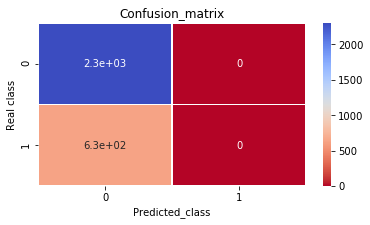


----------Classification Report------------------------------------
              precision    recall  f1-score   support

       False       0.78      1.00      0.88      2305
        True       0.00      0.00      0.00       634

    accuracy                           0.78      2939
   macro avg       0.39      0.50      0.44      2939
weighted avg       0.62      0.78      0.69      2939

________________________________________________________________________________________________________
the model classification for 0.3333333333333333 proportion of true (recommended)
the recall for this model is : 0.021671826625386997
TP 21
TN 3433
FP 7
FN 948


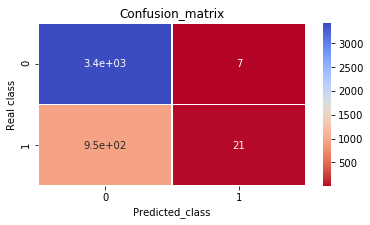


----------Classification Report------------------------------------
              precision    recall  f1-score   support

       False       0.78      1.00      0.88      3440
        True       0.75      0.02      0.04       969

    accuracy                           0.78      4409
   macro avg       0.77      0.51      0.46      4409
weighted avg       0.78      0.78      0.69      4409

________________________________________________________________________________________________________
the model classification for 0.25 proportion of true (recommended)
the recall for this model is : 0.027928626842513578
TP 36
TN 4583
FP 6
FN 1253


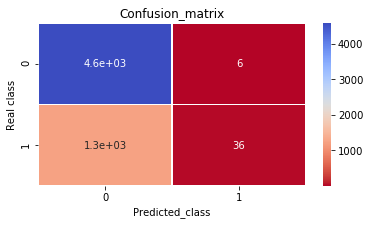


----------Classification Report------------------------------------
              precision    recall  f1-score   support

       False       0.79      1.00      0.88      4589
        True       0.86      0.03      0.05      1289

    accuracy                           0.79      5878
   macro avg       0.82      0.51      0.47      5878
weighted avg       0.80      0.79      0.70      5878

________________________________________________________________________________________________________


In [15]:
# SVC

for i in range(1, 4):
    print(
        "the model classification for {} proportion of true (recommended)".format(
            1 / (i + 1)
        )
    )
    (
        undersample_features_train,
        undersample_features_test,
        undersample_labels_train,
        undersample_labels_test,
    ) = loader.load_split_preprocessed_data(i)
    clf = SVC()  # here we are just changing classifier
    ml.model(
        clf,
        undersample_features_train,
        undersample_features_test,
        undersample_labels_train,
        undersample_labels_test,
    )
    print(
        "________________________________________________________________________________________________________"
    )

the model classification for 0.5 proportion of true (recommended)
the recall for this model is : 0.8909657320872274
TP 572
TN 2276
FP 21
FN 70


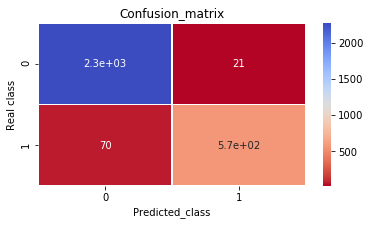


----------Classification Report------------------------------------
              precision    recall  f1-score   support

       False       0.97      0.99      0.98      2297
        True       0.96      0.89      0.93       642

    accuracy                           0.97      2939
   macro avg       0.97      0.94      0.95      2939
weighted avg       0.97      0.97      0.97      2939

________________________________________________________________________________________________________
the model classification for 0.3333333333333333 proportion of true (recommended)
the recall for this model is : 0.9639065817409767
TP 908
TN 3451
FP 16
FN 34


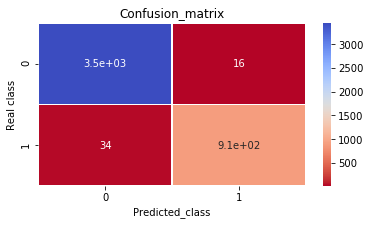


----------Classification Report------------------------------------
              precision    recall  f1-score   support

       False       0.99      1.00      0.99      3467
        True       0.98      0.96      0.97       942

    accuracy                           0.99      4409
   macro avg       0.99      0.98      0.98      4409
weighted avg       0.99      0.99      0.99      4409

________________________________________________________________________________________________________
the model classification for 0.25 proportion of true (recommended)
the recall for this model is : 0.9829545454545454
TP 1211
TN 4635
FP 11
FN 21


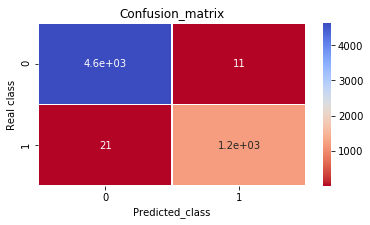


----------Classification Report------------------------------------
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      4646
        True       0.99      0.98      0.99      1232

    accuracy                           0.99      5878
   macro avg       0.99      0.99      0.99      5878
weighted avg       0.99      0.99      0.99      5878

________________________________________________________________________________________________________


In [16]:
# Random Forest Classifier
for i in range(1, 4):
    print(
        "the model classification for {} proportion of true (recommended)".format(
            1 / (i + 1)
        )
    )
    (
        undersample_features_train,
        undersample_features_test,
        undersample_labels_train,
        undersample_labels_test,
    ) = loader.load_split_preprocessed_data(i)
    clf = RandomForestClassifier(
        n_estimators=100
    )  # here we are just changing classifier
    ml.model(
        clf,
        undersample_features_train,
        undersample_features_test,
        undersample_labels_train,
        undersample_labels_test,
    )
    print(
        "________________________________________________________________________________________________________"
    )

### We see that random forest classifier with 3 proportion in undersampling is the best model for this data.